<a href="https://colab.research.google.com/github/eduardosconti/FastAIProject/blob/main/FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


ENGLISH PROJECT TEAM:

*   Eduardo Siqueira Conti - ESC3
*   Mateus Costa Beltrao Tavares - MCBT

Our goal on this project is tell apart pictures of wardrobes, sofas and tables. We will build a deep learning model to achieve this goal.



First we're gonna run the basics setup commands:

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.5MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 1.2MB 19.5MB/s 
     |████████████████████████████████| 194kB 27.5MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 25.0MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

Since the azure 30 days free trial was over, we installed an image scrapper to download our database images.

In [ ]:
pip install jmd_imagescraper

It is very easy to use, you just need the command duckduckgo_search and some parameters and the scrapper searches and download to you.

In [ ]:
from jmd_imagescraper.core import*
from pathlib import Path

path = Path().cwd()
duckduckgo_search(path, "table", "table", max_results=100)
path = Path().cwd()
duckduckgo_search(path, "sofa", "sofa", max_results=100)
path = Path().cwd()
duckduckgo_search(path, "wardrobe", "wardrobe", max_results=100)

Duckduckgo search: table


Duckduckgo search: sofa


Duckduckgo search: wardrobe


[Path('/content/wardrobe/001_e9836020.jpg'),
 Path('/content/wardrobe/002_0575dd63.jpg'),
 Path('/content/wardrobe/003_4324f545.jpg'),
 Path('/content/wardrobe/004_a6d536c8.jpg'),
 Path('/content/wardrobe/005_581358fb.jpg'),
 Path('/content/wardrobe/006_e3621a30.jpg'),
 Path('/content/wardrobe/007_751b9684.jpg'),
 Path('/content/wardrobe/008_7a5114bc.jpg'),
 Path('/content/wardrobe/009_01432e11.jpg'),
 Path('/content/wardrobe/010_9d19614a.jpg'),
 Path('/content/wardrobe/011_d7f57ae2.jpg'),
 Path('/content/wardrobe/012_cf3a7cb8.jpg'),
 Path('/content/wardrobe/013_9e2adeb2.jpg'),
 Path('/content/wardrobe/014_8ad6de68.jpg'),
 Path('/content/wardrobe/015_1501695f.jpg'),
 Path('/content/wardrobe/016_8d75d9a6.jpg'),
 Path('/content/wardrobe/017_3f80ccfc.jpg'),
 Path('/content/wardrobe/018_5526a1b1.jpg'),
 Path('/content/wardrobe/019_d0888704.jpg'),
 Path('/content/wardrobe/020_609d1b54.jpg'),
 Path('/content/wardrobe/021_06c92a93.jpg'),
 Path('/content/wardrobe/022_707eb979.jpg'),
 Path('/co

In [ ]:
fns=get_image_files(path)
fns

(#300) [Path('/content/wardrobe/086_7eb3e099.jpg'),Path('/content/wardrobe/074_fca30622.jpg'),Path('/content/wardrobe/096_30dbcc58.jpg'),Path('/content/wardrobe/099_7819c631.jpg'),Path('/content/wardrobe/014_8ad6de68.jpg'),Path('/content/wardrobe/013_9e2adeb2.jpg'),Path('/content/wardrobe/077_4cccca8a.jpg'),Path('/content/wardrobe/005_581358fb.jpg'),Path('/content/wardrobe/010_9d19614a.jpg'),Path('/content/wardrobe/018_5526a1b1.jpg')...]

Now we will search for corrupted files or failed downloads and unlink them.

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink);

We will build a DataBlock on which we can apply the deep learning. The datablock has the RandomResizedCrop function on it, with the goal of increasing the model's efficiency.

In [ ]:
furniture = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

We will create a DataLoader and look some images on the batch.

In [ ]:
dls = furniture.dataloaders(path)

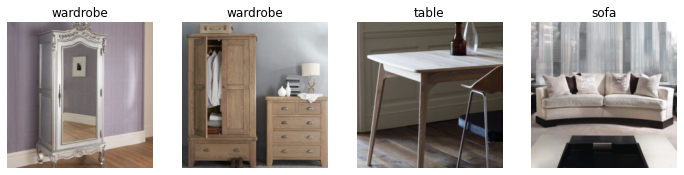

In [ ]:
dls.valid.show_batch(max_n=4,nrows=1)

Now we will call a learner with 4 different training iterations (or epochs).

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.657637,1.436505,0.550000,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.967535,0.364363,0.116667,00:43
1,0.656900,0.075464,0.016667,00:42
2,0.524622,0.031641,0.016667,00:42
3,0.423488,0.022171,0.000000,00:42


We did some testing on this model on another colab file. You can find the test here: https://colab.research.google.com/drive/1Xu_x7BfU2wQSgoUUgG_ul5-QOiTfmXId?usp=sharing

A print is avalible here: https://drive.google.com/file/d/1AVt_Kz8DZ63AngaUfkCtGo-vKrZwcg6C/view?usp=sharing

We will plot an confusion matrix, which tells how many images in the validation set were correctly classified and hor many were incorrectly classified.

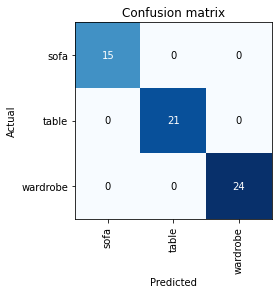

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

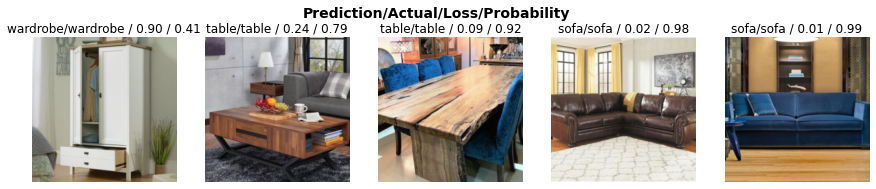

In [ ]:
interp.plot_top_losses(5, nrows=1)

We will now try another learn function with other metrics:

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.493864,0.337764,0.133333,00:55
1,0.857285,0.175140,0.033333,00:55
2,0.596442,0.137304,0.033333,00:54


epoch,train_loss,valid_loss,error_rate,time
0,0.169972,0.128856,0.033333,01:11
1,0.131397,0.107439,0.033333,01:11
2,0.110648,0.096011,0.016667,01:11
3,0.098855,0.084781,0.016667,01:11
4,0.086297,0.079517,0.016667,01:11
5,0.087403,0.075328,0.016667,01:11
6,0.091880,0.073323,0.016667,01:11
7,0.083777,0.067591,0.016667,01:11
8,0.079054,0.064537,0.016667,01:11
9,0.073314,0.063405,0.016667,01:11


Now we want to plot a graph of the training and validation loss:

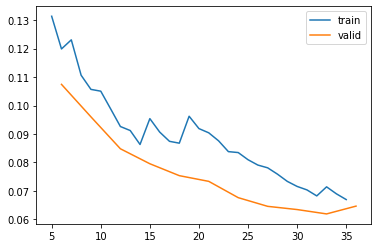

In [ ]:
learn.recorder.plot_loss()

After running all simulations on chapter 5, the ResNet-50 with mixed precision attempt showed the best results, since it changes the learning rates for us:

In [ ]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/autocast_mode.py:114: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")
/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,error_rate,time
0,1.782716,0.934532,0.400000,01:44
1,1.071099,0.157611,0.083333,01:46
2,0.735832,0.032647,0.016667,01:45


epoch,train_loss,valid_loss,error_rate,time
0,0.081811,0.029135,0.016667,02:06
1,0.045796,0.014548,0.000000,02:06
2,0.035115,0.016248,0.016667,02:06
3,0.028850,0.021957,0.016667,02:06
4,0.029160,0.019067,0.016667,02:07
5,0.030038,0.015087,0.000000,02:06


Now, to test our model, we will export it and create a button that allows us to upload an image from the computer and see how the model analyzes it. We tested with a picture of the sofa of one of the group's members on the first test and got 84%. Now lets compare with this new function:

In [ ]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

learn_inf = load_learner(path/'export.pkl')

btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: sofa; Probability: 0.9015')

This part tells us the label the image is best associated to and a probability (from 0 (0%) to 1 (100%)) of it being correct, based on the training. On the first model we had 84% and now with this better model, 90%. This shows us that not the model is more certain about if the image is a sofa.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

The last code we will run is to update the export code and the export.pkl. We will also make another button for further testing of the model.

In [ ]:
learn.export()

In [ ]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

learn_inf = load_learner(path/'export.pkl')

btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
img = PILImage.create(btn_upload.data[-1])

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred